In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
################################
data = 'dataIsopod3.csv'
df = pd.read_csv(data)
df # this is your data reorganized, conv to .csv for input via pandas package --> dataframe = df
df2 = pd.read_csv('COMBOSTATUS.csv')
df2

,VO2 (mL/h),StatusT_RP
0,1.697856,RoomOpen
1,0.547780,RoomClosed
2,0.277897,WarmOpen
3,0.195277,WarmClosed
4,0.580545,AmbOpen
5,0.210627,AmbClosed
6,0.631879,RoomOpen
7,0.747969,RoomClosed
8,0.346789,WarmOpen
9,0.000000,WarmClosed


In [3]:
# possibility 2 for data visualization (ggplot, point plot)
from lets_plot import *
ggplot(df) + geom_point(aes(color="status", x="Temp Trtmt", y="Weight Specific VO2 ")) + ggtitle("Weight-specific VO2 over varying temp treatments") + xlab("Temperature Treatment") + ylab("Weight Specific VO2 (mLg-1h-1)")

In [4]:
# possibility 1a for data visualization (ggplot, stacked box)
from lets_plot import *
ggplot(df) + geom_bar(aes(fill="status", x="Temp Trtmt", y="Weight Specific VO2 "), stat='identity') + ggtitle("Weight-specific VO2 over varying temp treatments") + xlab("Temperature Treatment") + ylab("Weight Specific VO2 (mLg-1h-1)")

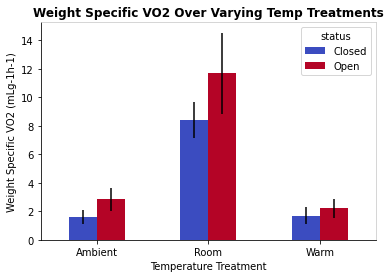

In [7]:
# possibility 2 for data visualization, based on sample xlsx 
### pivot data
dfp = df.pivot(index='Temp Trtmt', columns='status', values='Weight Specific VO2 ')
yerr = df.pivot(index='Temp Trtmt', columns='status', values='sterr')
ax = dfp.plot(kind='bar', 
    yerr=yerr, 
    rot=0,
    cmap='coolwarm', # I like cool but I'm not sure if your professor is chill
    title='Weight Specific VO2 Over Varying Temp Treatments',
    xlabel='Temperature Treatment',
    ylabel='Weight Specific VO2 (mLg-1h-1)'
    )
ttl = ax.title
ttl.set_weight('bold')
ax.spines['right'].set_color((.8,.8,.8))
ax.spines['top'].set_color((.8,.8,.8))

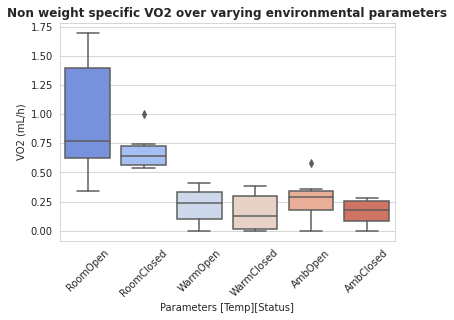

In [12]:
sns.set_style("whitegrid")
# ex = df2.boxplot(by = 'StatusT_RP', column=['VO2 (mL/h)'])
exx = sns.boxplot(x=df2['StatusT_RP'], y=df2['VO2 (mL/h)'],palette='coolwarm')
exx.set_xticklabels(exx.get_xticklabels(), rotation=45)
exx.set(xlabel='Parameters [Temp][Status]',title='Non weight specific VO2 over varying environmental parameters')
ttl = exx.title
ttl.set_weight('bold')